In [2]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import scipy.stats as st
%pylab inline
#__authors__ = Matt, Kent, Valeria, and Tarek

Populating the interactive namespace from numpy and matplotlib


# The Experiment 

### Our Idea: The average age of female riders and male riders are not the same.

### Our Null Hypothesis: Over the span of one month, the average age of female riders is equal to the average age of male riders

### $H_0:  F_m = M_m$

### Our Alternative Hypotheses: Over the span of one month, the average age of female riders is not equal to the average age of male riders

### $H_a: F_m != M_m$

### We will use a significance level of $α = 0.05$

In [3]:
datestring = "201707"
df = pd.read_csv('/gws/open/Student/citibike' + "/" + datestring + '-citibike-tripdata.csv.zip', compression='zip')

In [5]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,364,2017-07-01 00:00:00,2017-07-01 00:06:05,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241,3107,Bedford Ave & Nassau Ave,40.723117,-73.952123,14744,Subscriber,1986.0,1
1,2142,2017-07-01 00:00:03,2017-07-01 00:35:46,293,Lafayette St & E 8 St,40.730207,-73.991026,3425,2 Ave & E 104 St,40.789210,-73.943708,19587,Subscriber,1981.0,1
2,328,2017-07-01 00:00:08,2017-07-01 00:05:37,3242,Schermerhorn St & Court St,40.691029,-73.991834,3397,Court St & Nelson St,40.676395,-73.998699,27937,Subscriber,1984.0,2
3,2530,2017-07-01 00:00:11,2017-07-01 00:42:22,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,398,Atlantic Ave & Furman St,40.691652,-73.999979,26066,Subscriber,1985.0,1
4,2534,2017-07-01 00:00:15,2017-07-01 00:42:29,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,398,Atlantic Ave & Furman St,40.691652,-73.999979,29408,Subscriber,1982.0,2


In [6]:
df['age'] = 2017 - (df['birth year'])
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,age
0,364,2017-07-01 00:00:00,2017-07-01 00:06:05,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241,3107,Bedford Ave & Nassau Ave,40.723117,-73.952123,14744,Subscriber,1986.0,1,31.0
1,2142,2017-07-01 00:00:03,2017-07-01 00:35:46,293,Lafayette St & E 8 St,40.730207,-73.991026,3425,2 Ave & E 104 St,40.789210,-73.943708,19587,Subscriber,1981.0,1,36.0
2,328,2017-07-01 00:00:08,2017-07-01 00:05:37,3242,Schermerhorn St & Court St,40.691029,-73.991834,3397,Court St & Nelson St,40.676395,-73.998699,27937,Subscriber,1984.0,2,33.0
3,2530,2017-07-01 00:00:11,2017-07-01 00:42:22,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,398,Atlantic Ave & Furman St,40.691652,-73.999979,26066,Subscriber,1985.0,1,32.0
4,2534,2017-07-01 00:00:15,2017-07-01 00:42:29,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,398,Atlantic Ave & Furman St,40.691652,-73.999979,29408,Subscriber,1982.0,2,35.0


In [7]:
df.drop(['tripduration', 'starttime', 'stoptime', 'start station id',
      'start station name', 'start station latitude',
      'start station longitude', 'end station id', 'end station name',
      'end station latitude', 'end station longitude', 'bikeid', 'usertype'
       ], axis=1, inplace=True)
df.head()

,birth year,gender,age
0,1986.0,1,31.0
1,1981.0,1,36.0
2,1984.0,2,33.0
3,1985.0,1,32.0
4,1982.0,2,35.0


## Our first attempt at plotting the data

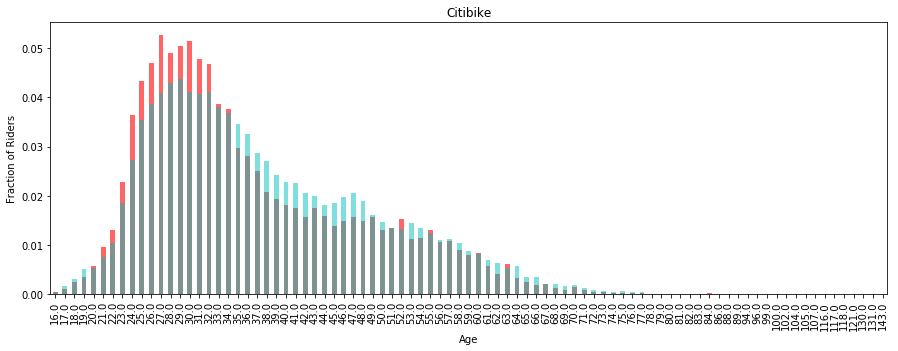

In [8]:
gencount = df['gender'].value_counts() 
femaleAgeCount = (df['age'][df['gender'] == 2].groupby([df['age']]).count())/gencount[2]
maleAgeCount = (df['age'][df['gender'] == 1].groupby([df['age']]).count())/gencount[1]

fig = figsize(15,5)
femaleAgeCount.plot(kind="bar", color = 'r', alpha=.6)
maleAgeCount.plot(kind="bar", color = 'c', alpha=.5)
pl.xlabel('Age')
pl.ylabel('Fraction of Riders')
pl.title('Citibike');

## Fig. 1 shows the normalized distribution of age by gender. After plotting this, we were able to visualize a difference between the age distributions for male and female riders.

In [9]:
dfAvg = df.groupby('gender', as_index=False).age.mean()
dfAvg = dfAvg.drop(dfAvg.index[0])
dfAvg

,gender,age
1,1,37.813331
2,2,36.290960


## Our second plot

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

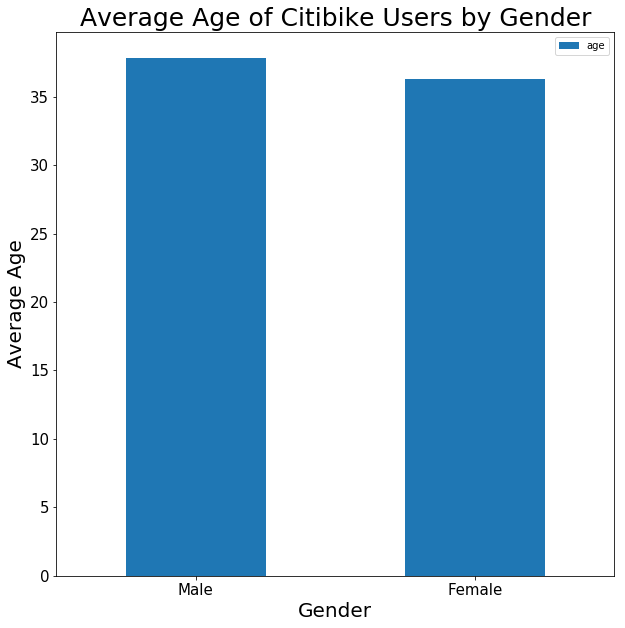

In [10]:
fig = figsize(10,10)
dfAvg['gender'][1] = 'Male' 
dfAvg['gender'][2] = 'Female'
dfAvg.plot(x='gender',y='age', kind='bar', fontsize=15, rot=0);
pl.xlabel('Gender', fontsize=20)
pl.ylabel('Average Age', fontsize=20)
pl.title('Average Age of Citibike Users by Gender', fontsize=25);

#### Fig. 2 showcases the average age of Citibike users separated by gender. These numbers will be used to determine whether there is a significant difference between the average age of users based on gender.

---

# Doing it again without the Outliers

In [11]:
#Creating a new dataframe without the outliers, determined to be riders reportes as older than 80 years of age
dfClean = df[(df.age < 80)]

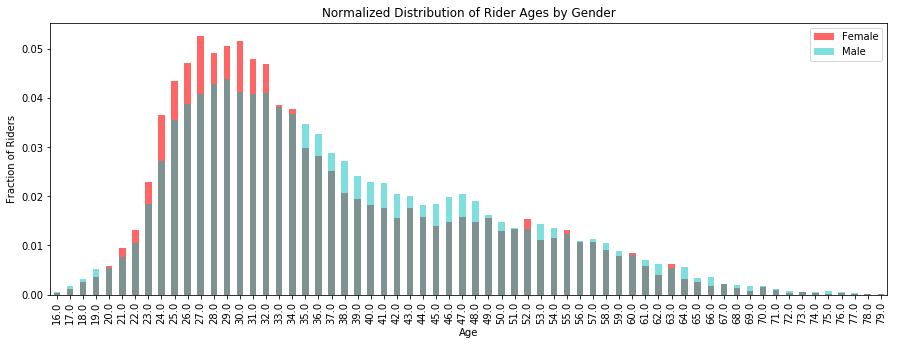

In [17]:
legendNames = ['Female', 'Male']
gencount = dfClean['gender'].value_counts() 
femaleAgeCount = (dfClean['age'][dfClean['gender'] == 2].groupby([dfClean['age']]).count())/gencount[2]
maleAgeCount = (dfClean['age'][dfClean['gender'] == 1].groupby([dfClean['age']]).count())/gencount[1]

fig = figsize(15,5)
femaleAgeCount.plot(kind="bar", color = 'r', alpha=.6)
maleAgeCount.plot(kind="bar", color = 'c', alpha=.5)
pl.xlabel('Age')
pl.ylabel('Fraction of Riders')
pl.legend(legendNames)
pl.title('Normalized Distribution of Rider Ages by Gender');

## Fig. 3 again shows the normalized distribution of age by gender, with an upper age limit of 79. Similar to Fig. 1, this helps us visualize a difference between the age distributions for male and female riders.

In [18]:
dfAvg = dfClean.groupby('gender', as_index=False).age.mean()
dfAvg = dfAvg.drop(dfAvg.index[0])
dfAvg

,gender,age
1,1,37.770700
2,2,36.255908


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


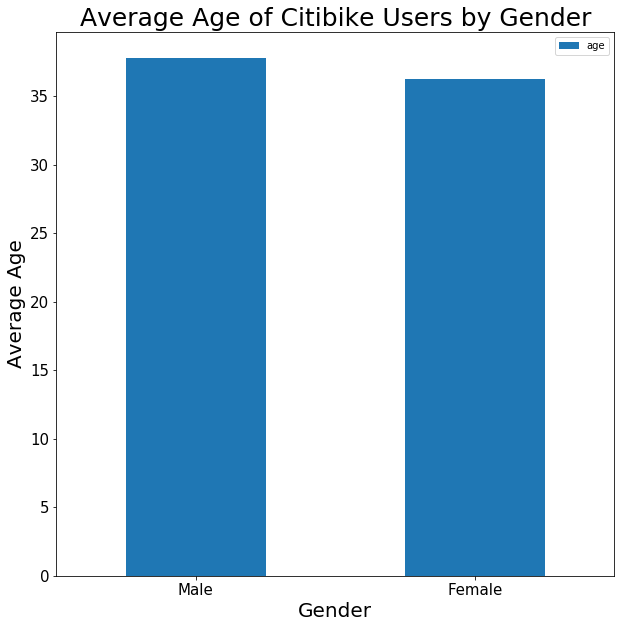

In [19]:
fig = figsize(10,10)
dfAvg['gender'][1] = 'Male' 
dfAvg['gender'][2] = 'Female'
dfAvg.plot(x='gender',y='age', kind='bar', fontsize=15, rot=0)
pl.xlabel('Gender', fontsize=20)
pl.ylabel('Average Age', fontsize=20)
pl.title('Average Age of Citibike Users by Gender', fontsize=25);

### Fig. 4, though sparce, shows that there is a difference between the average age of male and female users. 

In [20]:
#Better representing the data for the sake of inculding it in the report
dfAvg['gender'].replace('Female',2)
dfAvg['gender'].replace('Male',1)
dfAvg = dfAvg.rename(columns={'gender': 'Gender', 'age': 'Average Age'})
dfAvg.head()

,Gender,Average Age
1,Male,37.770700
2,Female,36.255908


---

# Determining statistical significance 

To test for significance, we will use a two-tailed independent t-Test. Alternatively, we were encouraged to use the z-Test and the Chi-Squared test in conducting our statistical analysis. For this experiment, we cannot use Chi-Squared because age is not categorical and we are not testing a proportion, and we cannot use the  z-Test because we do not have the population parameters. Thus, we concluded that the independent t-Test was our best fit. At first we were considering a one-tailed t-test to determine if female riders had a significantly lower average age than male riders, but eventually determined that we did not have a strong enough reason to pre-determine the direction of our significance, thus we used the two-tailed t-test. 

In [21]:
#Female metrics
print(dfClean['age'][dfClean['gender'] == 2].describe())
fArray = dfClean['age'][dfClean['gender'] == 2]
fMean = 36.25
fSTD = 11.18

count    400765.000000
mean         36.255908
std          11.180363
min          16.000000
25%          28.000000
50%          33.000000
75%          43.000000
max          79.000000
Name: age, dtype: float64


In [22]:
#Male metrics
print(dfClean['age'][dfClean['gender'] == 1].describe())
mArray = dfClean['age'][dfClean['gender'] == 1]
mMean = 37.77
mSTD = 11.49

count    1.098604e+06
mean     3.777070e+01
std      1.149182e+01
min      1.600000e+01
25%      2.900000e+01
50%      3.500000e+01
75%      4.600000e+01
max      7.900000e+01
Name: age, dtype: float64


In [23]:
#Running the test
st.ttest_ind(mArray, fArray, equal_var=False)

Ttest_indResult(statistic=72.870881234300498, pvalue=0.0)

### Based on the results of the t-Test, which returned a p-value of 0.0 and a t-statistic of 72.87, we can reject our null-hypothesis and assert that there is a significant difference between the average ages of male and female Citi Bike users